#### Лабораторная работа №1. Ковалёва Елена Сергеевна. 20152

In [2]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.colors as colors
from sklearn import svm
import warnings
warnings.filterwarnings("ignore")

#### 1. Вычисление корреляции между признаками на всей таблице и отдельно по классам. Визуализирование распределения классов на всех парах переменных.
Исходные данные:\
три класса, три вида ириса:\
1)ирис щетинистый (Iris setosa)\
2)ирис виргинский (Iris virginica)\
3)ирис разноцветный (Iris versicolor)\
по четырем признакам:\
1)длина наружной доли околоцветника (sepal length)\
2)ширина наружной доли околоцветника (sepal width)\
3)длина внутренней доли околоцветника (petal length)\
4)ширина внутренней доли околоцветника (petal width)\
*Исходные данные представленны в виде таблицы*

In [33]:
iris = datasets.load_iris()
kind = [iris['target_names'][target] for target in iris['target']]
a_tar = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
a_lda = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
a = pd.DataFrame(data = iris['data'], columns= iris['feature_names'])
a_type = pd.DataFrame(data= np.c_[iris['data'], kind], columns= iris['feature_names'] + ['type'])
print("a:", a)
a_type

a:      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Представим корелляцию между признаками в виде диагональных таблиц.\
Лучше всего скореллированы:\
ширина внутренней доли околоцветника(petal width) и длина внутренней доли околоцветника(petal length)\
Хороший уровень корелляции:\
1)длина наружной доли околоцветника и ширина внутренней доли околоцветника (sepal length-petal width)\
2)длина наружной доли околоцветника и длина внутренней доли околоцветника (sepal length-petal length)\
Антикорелляция наблюдается между:\
ширина наружной доли околоцветника(sepal width) и длина внутренней доли околоцветника(petal length)

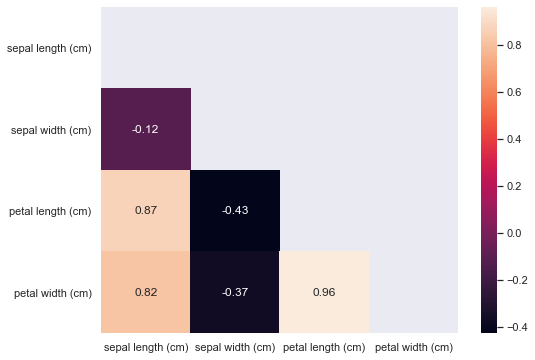

In [34]:
a0 = a.iloc[0:50,:]
a1 = a.iloc[50:100,:]
a2 = a.iloc[100:150,:]
b = a.corr()
b0 = a0.corr()
b1 = a1.corr()
b2 = a2.corr()
mask = np.zeros_like(b)
mask[np.triu_indices_from(mask)] = True
c = sns.heatmap(b, xticklabels=b.columns.values, yticklabels=b.columns.values, annot=True, mask=mask)

Корреляция на классе Ирис щетинистый (Iris setosa).\
Наиболее скореллированы:\
длина наружной доли околоцветника(sepal length) и ширина наружной доли околоцветника(sepal width)\
Хуже всего скореллированы:\
ширина наружной доли околоцветника(sepal width) и длина внутренней доли околоцветника(petal length)

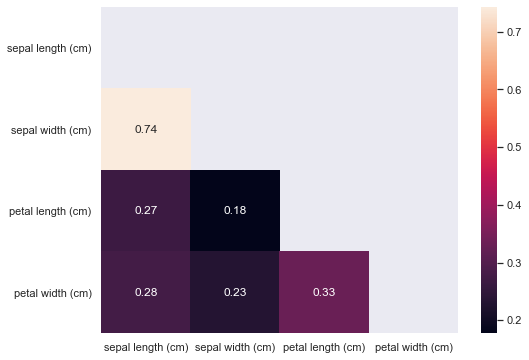

In [35]:
c0 = sns.heatmap(b0, xticklabels=b0.columns.values, yticklabels=b0.columns.values, annot=True, mask=mask)

Корреляция на классе Ирис виргинский (Iris virginica).\
Наиболее скореллиованы:\
ширина внутренней доли околоцветника(petal width) и длина внутренней доли околоцветника(petal length)\
Наименьшая корелляция:\
длина наружной доли околоцветника(sepal length) и ширина наружной доли околоцветника(sepal width)

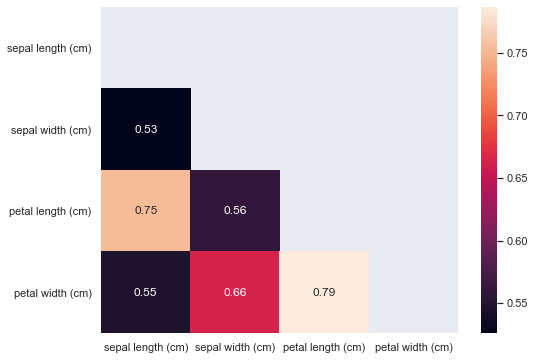

In [36]:
c1 = sns.heatmap(b1, xticklabels=b1.columns.values, yticklabels=b1.columns.values, annot=True, mask=mask)

Корреляция на классе Ирис разноцветный (Iris versicolor)\
Наибольшая корелляция:\
длина наружной доли околоцветника(sepal length) и длина внутренней доли околоцветника(petal length)\
Наименьшая корелляция:\
длина ширина наружной доли околоцветника(sepal width) и длина внутренней доли околоцветника(petal length)

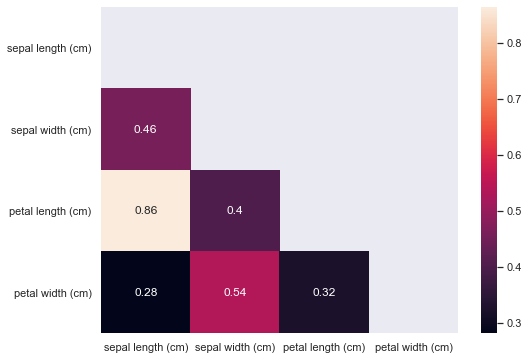

In [37]:
c2 = sns.heatmap(b2, xticklabels=b2.columns.values, yticklabels=b2.columns.values, annot=True, mask=mask)

Визуализируем распределения по классам на всех парах переменных:

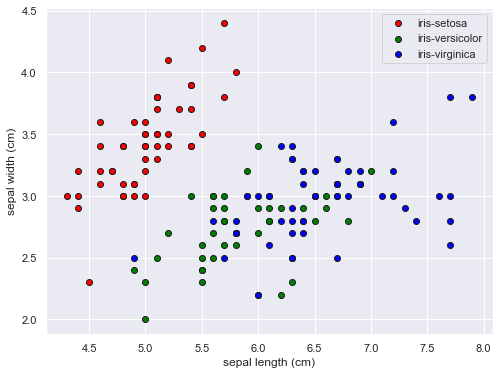

In [38]:
data = a_tar
plt.figure(2, figsize=(8,6))
plt.clf()
xx='sepal length (cm)'
yy='sepal width (cm)'
plt.scatter(data.loc[data.target==0,xx].values, data.loc[data.target==0,yy].values, c='red', label='iris-setosa', edgecolor='k')
plt.scatter(data.loc[data.target==1,xx].values, data.loc[data.target==1,yy].values, c='green', label='iris-versicolor', edgecolor='k')
plt.scatter(data.loc[data.target==2,xx].values, data.loc[data.target==2,yy].values, c='blue', label='iris-virginica', edgecolor='k')
plt.xlabel(xx)
plt.ylabel(yy)
plt.legend()

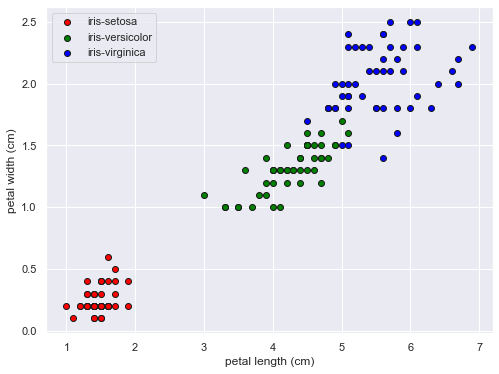

In [39]:
plt.figure(2, figsize=(8,6))
plt.clf()
xx='petal length (cm)'
yy='petal width (cm)'
plt.scatter(data.loc[data.target==0,xx].values, data.loc[data.target==0,yy].values, c='red', label='iris-setosa', edgecolor='k')
plt.scatter(data.loc[data.target==1,xx].values, data.loc[data.target==1,yy].values, c='green', label='iris-versicolor', edgecolor='k')
plt.scatter(data.loc[data.target==2,xx].values, data.loc[data.target==2,yy].values, c='blue', label='iris-virginica', edgecolor='k')
plt.xlabel(xx)
plt.ylabel(yy)
plt.legend()

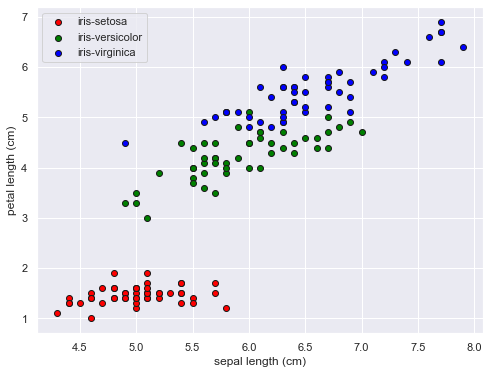

In [40]:
plt.figure(2, figsize=(8,6))
plt.clf()
xx='sepal length (cm)'
yy='petal length (cm)'
plt.scatter(data.loc[data.target==0,xx].values, data.loc[data.target==0,yy].values, c='red', label='iris-setosa', edgecolor='k')
plt.scatter(data.loc[data.target==1,xx].values, data.loc[data.target==1,yy].values, c='green', label='iris-versicolor', edgecolor='k')
plt.scatter(data.loc[data.target==2,xx].values, data.loc[data.target==2,yy].values, c='blue', label='iris-virginica', edgecolor='k')
plt.xlabel(xx)
plt.ylabel(yy)
plt.legend()

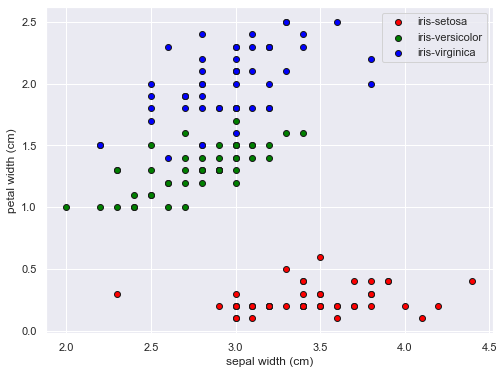

In [41]:
plt.figure(2, figsize=(8,6))
plt.clf()
xx='sepal width (cm)'
yy='petal width (cm)'
plt.scatter(data.loc[data.target==0,xx].values, data.loc[data.target==0,yy].values, c='red', label='iris-setosa', edgecolor='k')
plt.scatter(data.loc[data.target==1,xx].values, data.loc[data.target==1,yy].values, c='green', label='iris-versicolor', edgecolor='k')
plt.scatter(data.loc[data.target==2,xx].values, data.loc[data.target==2,yy].values, c='blue', label='iris-virginica', edgecolor='k')
plt.xlabel(xx)
plt.ylabel(yy)
plt.legend()

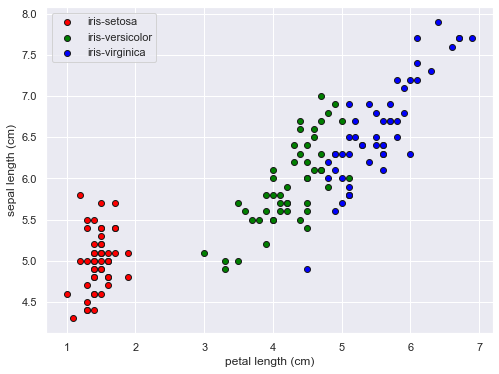

In [42]:
plt.figure(2, figsize=(8,6))
plt.clf()
xx='petal length (cm)'
yy='sepal length (cm)'
plt.scatter(data.loc[data.target==0,xx].values, data.loc[data.target==0,yy].values, c='red', label='iris-setosa', edgecolor='k')
plt.scatter(data.loc[data.target==1,xx].values, data.loc[data.target==1,yy].values, c='green', label='iris-versicolor', edgecolor='k')
plt.scatter(data.loc[data.target==2,xx].values, data.loc[data.target==2,yy].values, c='blue', label='iris-virginica', edgecolor='k')
plt.xlabel(xx)
plt.ylabel(yy)
plt.legend()

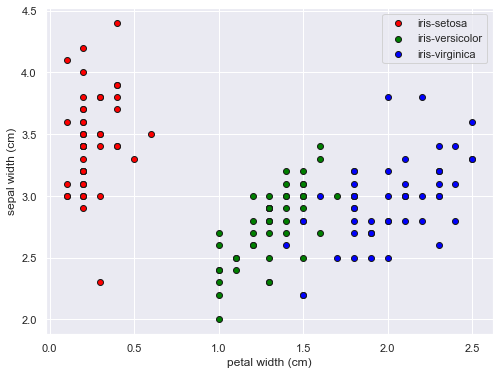

In [43]:
plt.figure(2, figsize=(8,6))
plt.clf()
xx='petal width (cm)'
yy='sepal width (cm)'
plt.scatter(data.loc[data.target==0,xx].values, data.loc[data.target==0,yy].values, c='red', label='iris-setosa', edgecolor='k')
plt.scatter(data.loc[data.target==1,xx].values, data.loc[data.target==1,yy].values, c='green', label='iris-versicolor', edgecolor='k')
plt.scatter(data.loc[data.target==2,xx].values, data.loc[data.target==2,yy].values, c='blue', label='iris-virginica', edgecolor='k')
plt.xlabel(xx)
plt.ylabel(yy)
plt.legend()

#### 2. Строим и визуализируем (разделяющей кривой) решения методами:
1)линейный и квадратичный дискриминант\
2)логистическая регрессия\
3)SVM (линейное и квадратичное ядро)

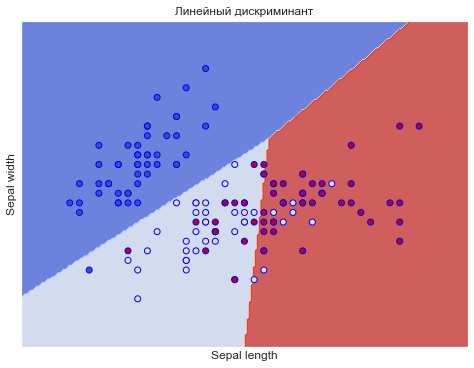

In [44]:
iris = datasets.load_iris()
X = iris.data[:, :2]
Y = iris.target
errors=[]

def doAll(classifier):
    
    y_pred= classifier.predict(X)
    errors.append(len(Y) - accuracy_score(Y,y_pred, normalize=False))
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h =0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(10,8))
    plt.contourf(xx, yy, Z, cmap = plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.coolwarm,marker='o',edgecolors="blue") 
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.show()

plt.title('Линейный дискриминант')
lin_disc= LinearDiscriminantAnalysis().fit(X,Y)
doAll(lin_disc) 

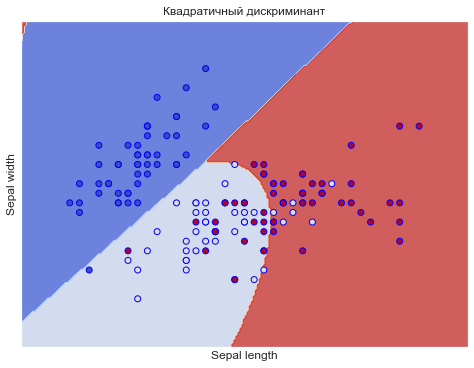

In [45]:
quad_disc= QuadraticDiscriminantAnalysis().fit(X,Y)
plt.title('Квадратичный дискриминант')
doAll(quad_disc) 

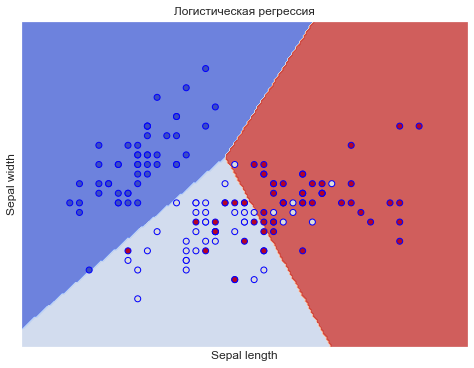

In [46]:
logreg = LogisticRegression().fit(X, Y)
plt.title('Логистическая регрессия')
doAll(logreg)

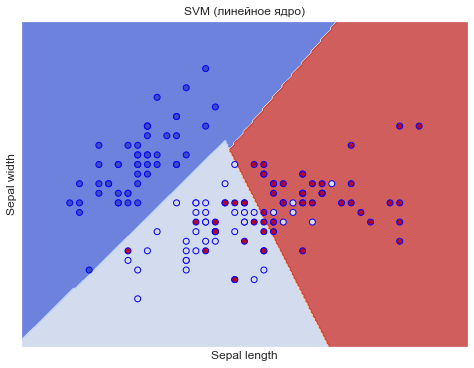

In [47]:
svc= svm.SVC(kernel='linear').fit(X,Y)
plt.title('SVM (линейное ядро)')
doAll(svc)

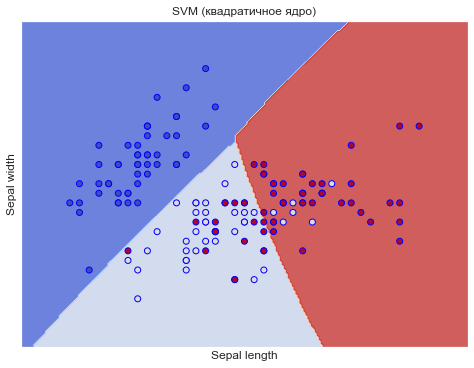

In [48]:
poly_svc=svm.SVC(degree=2).fit(X,Y)
plt.title('SVM (квадратичное ядро)')
doAll(poly_svc)

#### 3. Строим линейный дискриминант на всех переменных. Визуализируем ответы алгоритма.
По результатам предыдущих вычислений определено,что классы:\
1)Ирис виргинский (Iris virginica)\
2)Ирис разноцветный (Iris versicolor)\
наиболее перемешаны

Общее количество ошибок: [3]


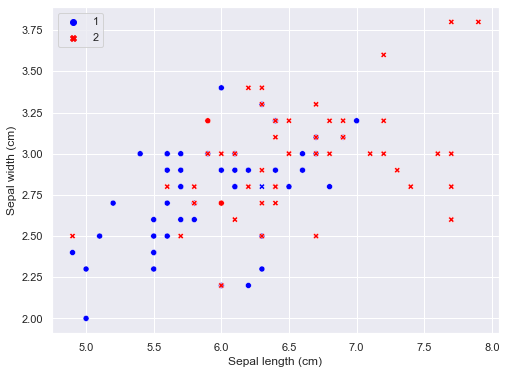

In [50]:
x= iris.data
y= iris.target
errors=[]
x=x[50:,:]
y=y[50:]
lin_disc= LinearDiscriminantAnalysis().fit(x,y)
y_predict=lin_disc.predict(x)
errors.append(len(y)- accuracy_score(y,y_predict,normalize=False))
print('Общее количество ошибок:',errors)
data=pd.DataFrame(x,columns=['Sepal length (cm)', 'Sepal width (cm)','Petal length (cm)','Petal width (cm)'])
sns.set() 
sns.set(rc={'figure.figsize':(8, 6)})
ax= sns.scatterplot(x='Sepal length (cm)', y='Sepal width (cm)', data=data, hue=y_predict, style=y, palette={1:'blue',2:'red'})

Общее количество ошибок: [3]


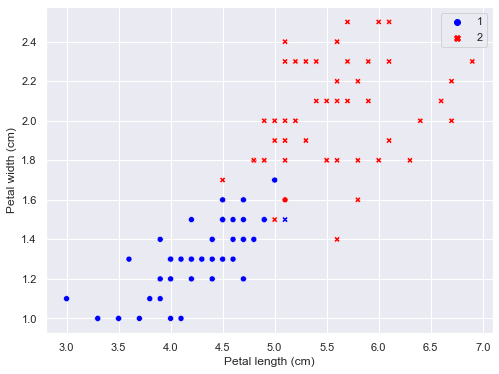

In [51]:
errors=[]
lin_disc= LinearDiscriminantAnalysis().fit(x,y)
y_predict=lin_disc.predict(x)
errors.append(len(y)- accuracy_score(y,y_predict,normalize=False))
print('Общее количество ошибок:',errors)
data=pd.DataFrame(x,columns=['Sepal length (cm)', 'Sepal width (cm)','Petal length (cm)','Petal width (cm)'])
sns.set() 
sns.set(rc={'figure.figsize':(8, 6)})
ax= sns.scatterplot(x='Petal length (cm)', y='Petal width (cm)', data=data, hue=y_predict, style=y, palette={1:'blue',2:'red'})

Общее количество ошибок: [3]


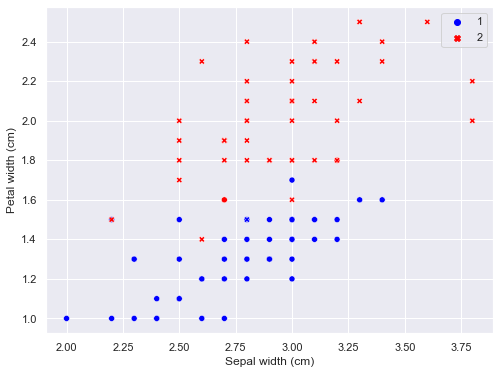

In [52]:
lin_disc= LinearDiscriminantAnalysis().fit(x,y)
y_predict=lin_disc.predict(x)
errors=[]
errors.append(len(y)- accuracy_score(y,y_predict,normalize=False))
print('Общее количество ошибок:',errors)
data=pd.DataFrame(x,columns=['Sepal length (cm)', 'Sepal width (cm)','Petal length (cm)','Petal width (cm)'])
sns.set() 
sns.set(rc={'figure.figsize':(8, 6)})
ax= sns.scatterplot(x='Sepal width (cm)', y='Petal width (cm)', data=data, hue=y_predict, style=y, palette={1:'blue',2:'red'})

Общее количество ошибок: [3]


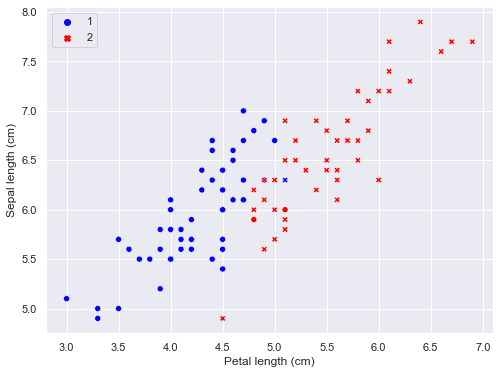

In [53]:
lin_disc= LinearDiscriminantAnalysis().fit(x,y)
y_predict=lin_disc.predict(x)
errors=[]
errors.append(len(y)- accuracy_score(y,y_predict,normalize=False))
print('Общее количество ошибок:',errors)
data=pd.DataFrame(x,columns=['Sepal length (cm)', 'Sepal width (cm)','Petal length (cm)','Petal width (cm)'])
sns.set() 
sns.set(rc={'figure.figsize':(8, 6)})
ax= sns.scatterplot(x='Petal length (cm)', y='Sepal length (cm)', data=data, hue=y_predict, style=y, palette={1:'blue',2:'red'})

Общее количество ошибок: [3]


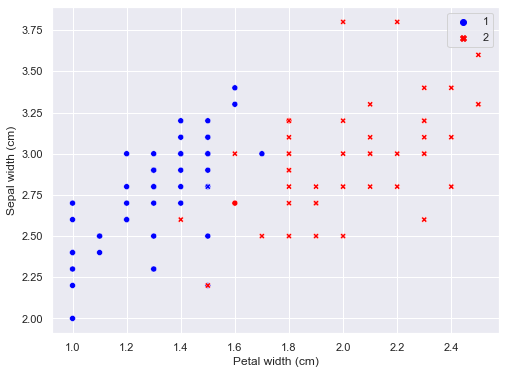

In [54]:
lin_disc= LinearDiscriminantAnalysis().fit(x,y)
y_predict=lin_disc.predict(x)
errors=[]
errors.append(len(y)- accuracy_score(y,y_predict,normalize=False))
print('Общее количество ошибок:',errors)
data=pd.DataFrame(x,columns=['Sepal length (cm)', 'Sepal width (cm)','Petal length (cm)','Petal width (cm)'])
sns.set() 
sns.set(rc={'figure.figsize':(8, 6)})
ax= sns.scatterplot(x='Petal width (cm)', y='Sepal width (cm)', data=data, hue=y_predict, style=y, palette={1:'blue',2:'red'})

Общее количество ошибок: [3]


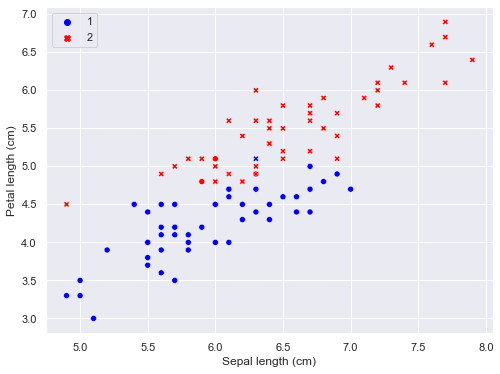

In [55]:
lin_disc= LinearDiscriminantAnalysis().fit(x,y)
y_predict=lin_disc.predict(x)
errors=[]
errors.append(len(y)- accuracy_score(y,y_predict,normalize=False))
print('Общее количество ошибок:',errors)
data=pd.DataFrame(x,columns=['Sepal length (cm)', 'Sepal width (cm)','Petal length (cm)','Petal width (cm)'])
sns.set() 
sns.set(rc={'figure.figsize':(8, 6)})
ax= sns.scatterplot(x='Sepal length (cm)', y='Petal length (cm)', data=data, hue=y_predict, style=y, palette={1:'blue',2:'red'})

#### 4. Вычисляем на двух переменных из п.2 квадратичной разделяющей функции по оценкам ковариационных матриц и средних.

In [56]:
#Воспользуемся QDA
quad_disc= QuadraticDiscriminantAnalysis().fit(x,y)
titles=('Quadratic Discriminant')
def qda_score(x,mu_k,sigma,pi_k):
    sigma_inv=np.linalg.inv(sigma)
    return (np.log(pi_k) -1/2 * np.log(np.linalg.det(sigma_inv)) - 1/2 * (x-mu_k).T @ sigma_inv @ (x-mu_k)).flatten()[0]

def predict_qda_class(x,mu_list,sigma_list,pi_list):
    scores_list=[]
    classes=len(mu_list)
    for p in range(classes):
        score= qda_score(x.reshape(-1,1), mu_list[p].reshape(-1,1), sigma_list[p], pi_list[p])
        scores_list.append(score)
    return np.argmax(scores_list)        
##Выводим результат в таблицу
a1 = data[['Sepal length (cm)', 'Sepal width (cm)']]
a1 = a1.join(pd.DataFrame(y, columns=['species']))
a1.head()
print(a1)

    Sepal length (cm)  Sepal width (cm)  species
0                 7.0               3.2        1
1                 6.4               3.2        1
2                 6.9               3.1        1
3                 5.5               2.3        1
4                 6.5               2.8        1
..                ...               ...      ...
95                6.7               3.0        2
96                6.3               2.5        2
97                6.5               3.0        2
98                6.2               3.4        2
99                5.9               3.0        2

[100 rows x 3 columns]


Визуализируем решение и сравниваем его с п.2.

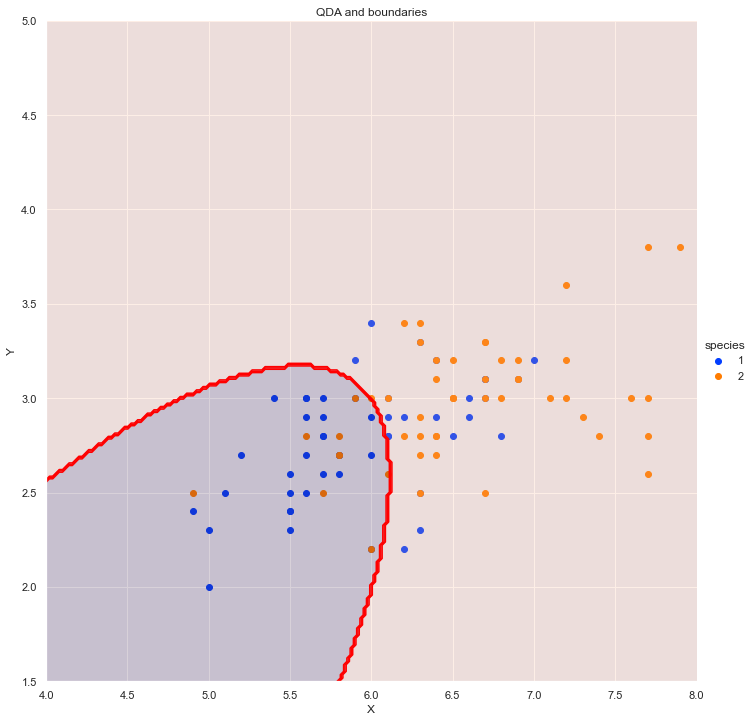

In [57]:
mu_list = np.split(a1.groupby('species').mean().values, 2)
sigma_list = np.split(a1.groupby('species').cov().values, 2)
pi_list = a1.iloc[:,2].value_counts().values / len(a1)
X_data = a1.iloc[:,1:2]
N = 200
X = np.linspace(4, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)
my_norm = colors.Normalize(vmin= -1.,vmax= 1.)
g= sns.FacetGrid(a1, hue='species', height=10,palette='bright').map(plt.scatter,'Sepal length (cm)','Sepal width (cm)').add_legend()
my_ax = g.ax
zz= np.array([predict_qda_class(np.array([xx, yy]).reshape(-1,1), mu_list, sigma_list, pi_list) for xx, yy in zip(np.ravel(X), np.ravel(Y))])
Z= zz.reshape(X.shape)
my_ax.contourf(X,Y,Z,2, alpha= .2)
my_ax.contour(X,Y,Z,2, alpha= 1, colors=('red'))
my_ax.set_xlabel('X')
my_ax.set_ylabel('Y')
my_ax.set_title('QDA and boundaries')
plt.show()

In [58]:
X_data = a1.iloc[:,0:2]
y_labels = a1.iloc[:,2]
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(X_data,y_labels)
y_pred = np.array(  [predict_qda_class( np.array([xx,yy]).reshape(-1,1), mu_list, sigma_list, pi_list) 
                     for xx, yy in zip(np.ravel(X_data.values[:,0]), np.ravel(X_data.values[:,1])) ] )
print('Общая доля ошибок:')
display(1. - qda.score(X_data,y_labels))

Общая доля ошибок:


0.29000000000000004